#Homework for Regression (basic) module


Link for data used:

https://drive.google.com/drive/folders/13zKKNCa5srQSC8pqYWCIn5oRPXMlOGid

I uploaded the files from my computer, so I did not connect the drive to this Collab.

I created a new folder called `data`, and placed the files into that.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import clone

%matplotlib notebook
%matplotlib inline

In [ ]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=c96ef7fe19adc3894cba33e17300dcbc223f7a903d94066d8716f60dc6582ed6
  Stored in directory: /root/.cache/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [ ]:
import docx
file_name = 'Dataset description.docx'
doc = docx.Document(fr'data/{file_name}')

In [ ]:
fullText = []
for para in doc.paragraphs:
    fullText.append(para.text)

for line in fullText:
  print(line)

Main link: 
Data Set Information:
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can

# EDA + DP

## Overview

In [ ]:
df = pd.read_csv('data/AirQualityUCI.csv', sep = ';', decimal = ',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Note that there are some problems with the end of the dataset, in the csv there is a lot if blank lines like `;;;;;;;;;;;;;;;`

Let's remove this rows. How I do that?

If we have a date that is empty, it means we don't know when the measure were.

Moreover, the Data Set Information sais that there are 9358 instances of responses, but our dataset has 9471.

In [ ]:
df['Date'].isna().sum()

114

In [ ]:
# 114 times the Date ar NaN, lets delete all those records.
df = df[df['Date'].notnull()]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN


Now we have 9357 rows, (1 less than what the description sais, but in my opinion that one is not important if we have 9300+ cases.

The last two column "Unnamed: 15" and "Unnamed: 16" has zero value in the full dataset, so I will drop those columns.

In [ ]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis =1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


If there is duplicated records, remove them.

In [ ]:
df.drop_duplicates(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Description sais that the missing values are specified with -200 value. Count those values.

In [ ]:
df[df == -200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

It seems in specify columns there is a lot of these values. Check those features later.

In [ ]:
def nan_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)

  missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
  return missing_data[missing_data['Total'] > 0]

In [ ]:
df = df.replace(-200, np.nan)

nan_percent(df)

,Total,Percent
NMHC(GT),8443,0.902319
CO(GT),1683,0.179865
NO2(GT),1642,0.175484
NOx(GT),1639,0.175163
PT08.S1(CO),366,0.039115
C6H6(GT),366,0.039115
PT08.S2(NMHC),366,0.039115
PT08.S3(NOx),366,0.039115
PT08.S4(NO2),366,0.039115
PT08.S5(O3),366,0.039115


For a lot of feature, there is the same 366 number of NaN values. That's interesting. We will take a look later.

Add a `Month` feature to the dataset.

In [ ]:
df['Month'] = df['Date'].str.slice(3, 5)
df['Month'] = df['Month'].astype(float)

Format Date and Time 

(In this case, we dont really need this 2 feature, so this step is not neccessary.)

In [ ]:
from datetime import datetime

# Convert Date into numbers
Date = []
for i in df['Date']:
    Date.append(datetime.strptime(str(i),'%d/%m/%Y'))

date = pd.Series(Date)
df['Date'] = pd.to_numeric(date)
df['Date'] = df['Date'].astype(float)

# Convert Time into numbers
Time = []
for i in df['Time']:
  Time.append(datetime.strptime(str(i), '%H.%M.%S'))

time = pd.Series(Time)
df['Time'] = pd.to_numeric(time)
df['Time'] = df['Time'].astype(float)

df[['Date', 'Time']].head()

,Date,Time
0,1.078877e+18,-2.208924e+18
1,1.078877e+18,-2.208920e+18
2,1.078877e+18,-2.208917e+18
3,1.078877e+18,-2.208913e+18
4,1.078877e+18,-2.208910e+18


## Target variable analysis

First, work with the target variable, which is `C6H6(GT)`.

In [ ]:
print('Target variable NaN values:', df['C6H6(GT)'].isna().sum())
df['C6H6(GT)'].describe()

Target variable NaN values: 366


count    8991.000000
mean       10.083105
std         7.449820
min         0.100000
25%         4.400000
50%         8.200000
75%        14.000000
max        63.700000
Name: C6H6(GT), dtype: float64

The dataset has 366 record where the target variable is NaN. I remove those rows, because let's say if I impute them with mean or median or mode values, that can distort the true values.

Plus only 0.04% of the data are NaN.

In [ ]:
df[df['C6H6(GT)'].isna()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
524,1.080778e+18,-2.208938e+18,1.7,NaN,222.0,NaN,NaN,99.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,4.0
525,1.080778e+18,-2.208935e+18,1.9,NaN,197.0,NaN,NaN,108.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN,4.0
526,1.080778e+18,-2.208931e+18,2.3,NaN,319.0,NaN,NaN,131.0,NaN,93.0,NaN,NaN,NaN,NaN,NaN,4.0
701,1.081382e+18,-2.208906e+18,2.0,NaN,137.0,NaN,NaN,129.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN,4.0
702,1.081469e+18,-2.208989e+18,2.4,NaN,189.0,NaN,NaN,154.0,NaN,109.0,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,1.108080e+18,-2.208928e+18,6.6,NaN,NaN,NaN,NaN,1227.0,NaN,326.0,NaN,NaN,NaN,NaN,NaN,2.0
8112,1.108080e+18,-2.208924e+18,6.5,NaN,NaN,NaN,NaN,1061.0,NaN,284.0,NaN,NaN,NaN,NaN,NaN,2.0
8113,1.108080e+18,-2.208920e+18,7.1,NaN,NaN,NaN,NaN,1075.0,NaN,289.0,NaN,NaN,NaN,NaN,NaN,2.0
8114,1.108080e+18,-2.208917e+18,4.9,NaN,NaN,NaN,NaN,641.0,NaN,215.0,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
df = df[df['C6H6(GT)'].notnull()]
nan_percent(df)

,Total,Percent
NMHC(GT),8104,0.901346
CO(GT),1647,0.183183
NO2(GT),1598,0.177733
NOx(GT),1595,0.177400


Now it looks so much cleaner. All those 366 NaN values were removed.

Lets take a look on the target `C6H6(GT)` variable.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


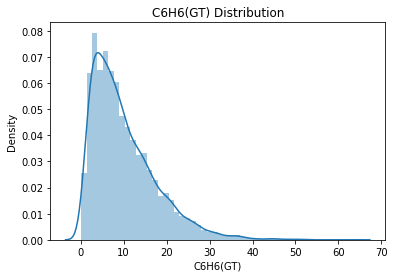

In [ ]:
sns.distplot(df['C6H6(GT)'], norm_hist=True)
plt.title('C6H6(GT) Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log C6H6(GT) Distribution')

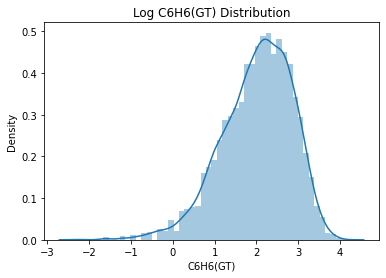

In [ ]:
sns.distplot(np.log(df['C6H6(GT)']), norm_hist = True)
plt.title('Log C6H6(GT) Distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sqrt C6H6(GT) Distribution')

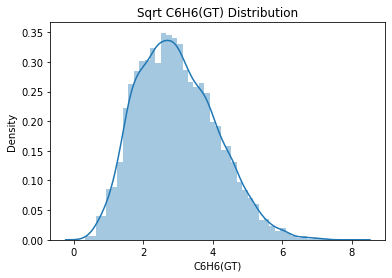

In [ ]:
sns.distplot(np.sqrt(df['C6H6(GT)']), norm_hist = True)
plt.title('Sqrt C6H6(GT) Distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cbrt C6H6(GT) Distribution')

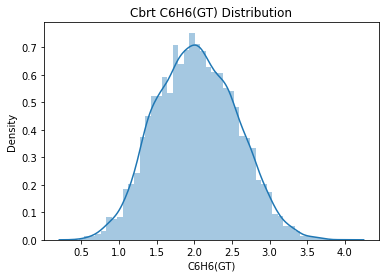

In [ ]:
# Cube Root Transformation
sns.distplot(np.cbrt(df['C6H6(GT)']), norm_hist = True)
plt.title('Cbrt C6H6(GT) Distribution')

This looks the best for a normal distribution.

## NaN values

In [ ]:
nan_percent(df)

,Total,Percent
NMHC(GT),8104,0.901346
CO(GT),1647,0.183183
NO2(GT),1598,0.177733
NOx(GT),1595,0.177400


`NMHC(GT)` (which is True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m$^3$)

has a huge, 90% rate of missing datas.

In [ ]:
df['NMHC(GT)'].describe()

count     887.000000
mean      218.607666
std       206.615130
min         7.000000
25%        66.000000
50%       145.000000
75%       297.000000
max      1189.000000
Name: NMHC(GT), dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NHMC(GT) Boxplot')

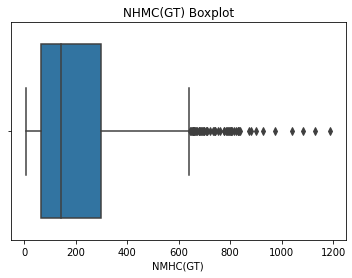

In [ ]:
sns.boxplot(df['NMHC(GT)'])
plt.title('NHMC(GT) Boxplot')

I drop this feature because in my opinion, 90% of missing data is a pretty huge value, and I can't really tell if any of the impute methods won't modify the results.

In [ ]:
df = df.drop('NMHC(GT)', axis = 1)

Now let's take a look at general informations about the dataset again.

In [ ]:
df.describe()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
count,8.991000e+03,8.991000e+03,7344.000000,8991.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1.095615e+18,-2.208947e+18,2.129711,1099.833166,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530,6.327772
std,9.743437e+15,2.488795e+13,1.436472,217.080037,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813,3.407854
min,1.078877e+18,-2.208989e+18,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,1.000000
25%,1.087171e+18,-2.208971e+18,1.100000,937.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,3.000000
50%,1.095638e+18,-2.208949e+18,1.800000,1063.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,6.000000
75%,1.104019e+18,-2.208928e+18,2.800000,1231.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,9.000000
max,1.112573e+18,-2.208906e+18,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   float64
 1   Time           8991 non-null   float64
 2   CO(GT)         7344 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7396 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7393 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
 14  Month          8991 non-null   float64
dtypes: float64(15)
memory usage: 1.1 MB


In [ ]:
def outliers_count(feature: str):
  # Count the outliers and their rates (from Maximum side)
  iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  outliers = df[feature][df[feature] > df[feature].quantile(0.75) + 1.5 * iqr]

  return outliers.count(), round(outliers.count() / df[feature].count() * 100, 4)


In [ ]:
def correlation_calculator(feature: str, target: str = 'C6H6(GT)'):
  # returns correlations with different methods compared to the original
  original_correlation = df[feature].corr(df[target])
  median_correlation = df[feature].fillna(df[feature].median()).corr(df[target])
  mean_correlation = df[feature].fillna(df[feature].mean()).corr(df[target])

  return original_correlation, median_correlation, mean_correlation

In [ ]:
def describe_display(feature: str, method: str):
  # displays .describe() for a specific feature
  if method == 'mean':
    return df[feature].fillna(df[feature].mean()).describe()
  elif method == 'median':
    return df[feature].fillna(df[feature].median()).describe()
  else:
    return -1

Text(0.5, 1.0, 'Box plot for features')

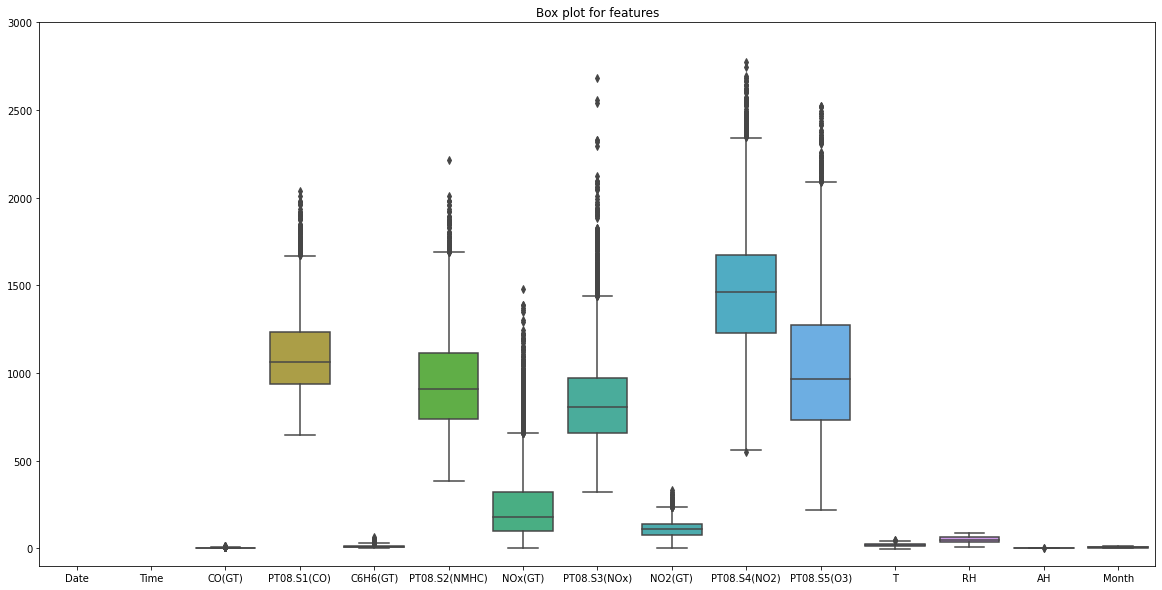

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data=df)
plt.ylim(-100, 3000)
plt.title('Box plot for features')

In this boxplot we can see that there are some high outliners, for example in `PT08.S3(NOx)`, or `NOx(GT)`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


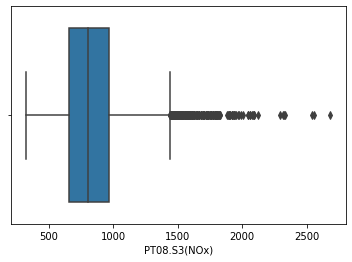

In [ ]:
sns.boxplot(df['PT08.S3(NOx)'])

In [ ]:
out_count, out_rate = outliers_count('PT08.S3(NOx)')
print('There is', out_count, f'outliers in PT08.S3(NOx)\nOutliers rate: {out_rate}%')

There is 241 outliers in PT08.S3(NOx)
Outliers rate: 2.6805%


Outliers are not many in this case, so lets keep them. If scores are bad in the future, we can deal with it later.

Deal with the NaN values, dive deeper into the features.

In [ ]:
nan_percent(df)

,Total,Percent
CO(GT),1647,0.183183
NO2(GT),1598,0.177733
NOx(GT),1595,0.177400


**CO(GT)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


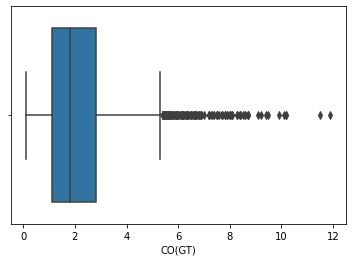

In [ ]:
sns.boxplot(df['CO(GT)'])

In [ ]:
out_count, out_rate = outliers_count('CO(GT)')
print('There is', out_count, f'outliers in CO(GT)\nOutliers rate: {out_rate}%')

There is 257 outliers in CO(GT)
Outliers rate: 3.4995%


I think 257 outlier is not so much in this case.

In [ ]:
df['CO(GT)'].describe()

count    7344.000000
mean        2.129711
std         1.436472
min         0.100000
25%         1.100000
50%         1.800000
75%         2.800000
max        11.900000
Name: CO(GT), dtype: float64

In [ ]:
print('Fill NaN with Median\n', describe_display('CO(GT)', method = 'median'), '\n\n')

print('Fill NaN with Mean\n', describe_display('CO(GT)', method = 'mean'))

Fill NaN with Median
 count    8991.000000
mean        2.069314
std         1.304487
min         0.100000
25%         1.200000
50%         1.800000
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64 


Fill NaN with Mean
 count    8991.000000
mean        2.129711
std         1.298237
min         0.100000
25%         1.200000
50%         2.129711
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64


In [ ]:
og, med, mean = correlation_calculator('CO(GT)')
print('Original correlation:',og, '\nMedian correlation:', med, '\nMean correlation:', mean)

Original correlation: 0.9310783250179346 
Median correlation: 0.84180188404755 
Mean correlation: 0.8404901529596228


I will choose to replace the NaN values with median, since it has a slightly better correlation between the target variable then the mean.

**NO2(GT)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


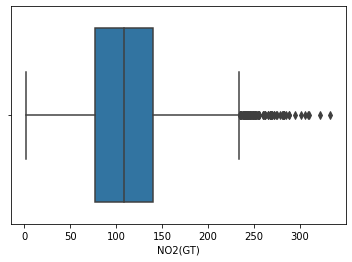

In [ ]:
sns.boxplot(df['NO2(GT)'])

In [ ]:
out_count, out_rate = outliers_count('NO2(GT)')
print('There is', out_count, f'outliers in NO2(GT)\nOutliers rate: {out_rate}%')

There is 98 outliers in NO2(GT)
Outliers rate: 1.3256%


In [ ]:
df['NO2(GT)'].describe()

count    7393.000000
mean      112.145137
std        47.629141
min         2.000000
25%        77.000000
50%       109.000000
75%       140.000000
max       333.000000
Name: NO2(GT), dtype: float64

In [ ]:
print('Fill NaN with Median\n', describe_display('NO2(GT)', method = 'median'), '\n\n')

print('Fill NaN with Mean\n', describe_display('NO2(GT)', method = 'mean'))

Fill NaN with Median
 count    8991.000000
mean      111.586142
std        43.205808
min         2.000000
25%        85.000000
50%       109.000000
75%       132.000000
max       333.000000
Name: NO2(GT), dtype: float64 


Fill NaN with Mean
 count    8991.000000
mean      112.145137
std        43.189073
min         2.000000
25%        85.000000
50%       112.145137
75%       132.000000
max       333.000000
Name: NO2(GT), dtype: float64


In [ ]:
og, med, mean = correlation_calculator('NO2(GT)')
print('Original correlation:',og, '\nMedian correlation:', med, '\nMean correlation:', mean)

Original correlation: 0.6144739375310477 
Median correlation: 0.5587103629692698 
Mean correlation: 0.5566644466533486


Again, replace NaN values with median are better than Mean.

**NOx(GT)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


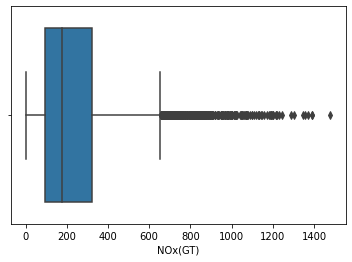

In [ ]:
sns.boxplot(df['NOx(GT)'])

In [ ]:
out_count, out_rate = outliers_count('NOx(GT)')
print('There is', out_count, f'outliers in NOx(GT)\nOutliers rate: {out_rate}%')

There is 411 outliers in NOx(GT)
Outliers rate: 5.5571%


That is a big higher than the previous, but lets keep them.

In [ ]:
df['NOx(GT)'].describe()

count    7396.000000
mean      242.189292
std       206.312007
min         2.000000
25%        97.000000
50%       178.000000
75%       321.000000
max      1479.000000
Name: NOx(GT), dtype: float64

In [ ]:
print('Fill NaN with Median\n', describe_display('NOx(GT)', method = 'median'), '\n\n')

print('Fill NaN with Mean\n', describe_display('NOx(GT)', method = 'mean'))

Fill NaN with Median
 count    8991.000000
mean      230.802135
std       188.717210
min         2.000000
25%       112.000000
50%       178.000000
75%       280.000000
max      1479.000000
Name: NOx(GT), dtype: float64 


Fill NaN with Mean
 count    8991.000000
mean      242.189292
std       187.117216
min         2.000000
25%       112.000000
50%       227.000000
75%       280.000000
max      1479.000000
Name: NOx(GT), dtype: float64


In [ ]:
og, med, mean = correlation_calculator('NOx(GT)')
print('Original correlation:',og, '\nMedian correlation:', med, '\nMean correlation:', mean)

Original correlation: 0.7188391336109184 
Median correlation: 0.6563253588618125 
Mean correlation: 0.6512336313420849


And for the 3rd time, the median "wins" again.

Summary: I will replace the NaN values with the median.

Check the other features (`Date`, `Time`)

In [ ]:
print(df['Date'].isna().sum())
print(df['Time'].isna().sum())

0
0


In [ ]:
df['Date'].describe()

count    8.991000e+03
mean     1.095615e+18
std      9.743437e+15
min      1.078877e+18
25%      1.087171e+18
50%      1.095638e+18
75%      1.104019e+18
max      1.112573e+18
Name: Date, dtype: float64

In [ ]:
df['Time'].describe()

count    8.991000e+03
mean    -2.208947e+18
std      2.488795e+13
min     -2.208989e+18
25%     -2.208971e+18
50%     -2.208949e+18
75%     -2.208928e+18
max     -2.208906e+18
Name: Time, dtype: float64

In [ ]:
df['Date'].value_counts()

1.095552e+18    24
1.100822e+18    24
1.100650e+18    24
1.100563e+18    24
1.100477e+18    24
                ..
1.093478e+18     6
1.078877e+18     6
1.103242e+18     4
1.108080e+18     3
1.081469e+18     1
Name: Date, Length: 383, dtype: int64

In [ ]:
df['Time'].value_counts()

-2.208956e+18    378
-2.208953e+18    377
-2.208942e+18    377
-2.208946e+18    377
-2.208974e+18    377
-2.208971e+18    377
-2.208967e+18    376
-2.208978e+18    376
-2.208949e+18    376
-2.208964e+18    376
-2.208960e+18    376
-2.208982e+18    375
-2.208935e+18    374
-2.208938e+18    374
-2.208985e+18    374
-2.208931e+18    373
-2.208924e+18    373
-2.208910e+18    373
-2.208913e+18    373
-2.208917e+18    373
-2.208989e+18    372
-2.208906e+18    372
-2.208920e+18    371
-2.208928e+18    371
Name: Time, dtype: int64

These informations are seems good, I think there is not much to clear in them.

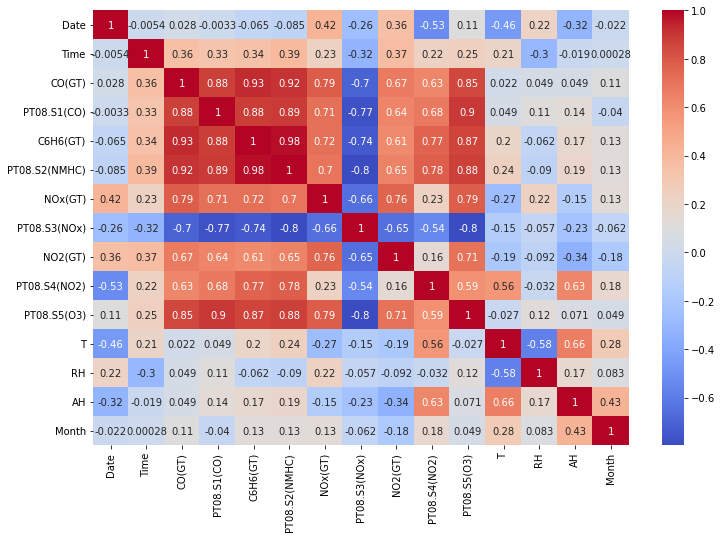

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

There are three feature (`T`, `RH`, `AH`) which has nearly zero correlation with the target variable, and all the other features. For this reason, I remove these columns too.

In [ ]:
df = df.drop(['T', 'RH', 'AH'], axis = 1)

`Date` and `Month` has low correlation too. (Obviously, they are increasing always.)

In [ ]:
df = df.drop(['Date', 'Month'], axis = 1)

In [ ]:
# Time has not correlate much with the target variable, but i keep it in the features.
# I've tested the regression without the feature, and my conclusion is that the scores are a very bit better with it.

#df = df.drop(['Time'], axis = 1)

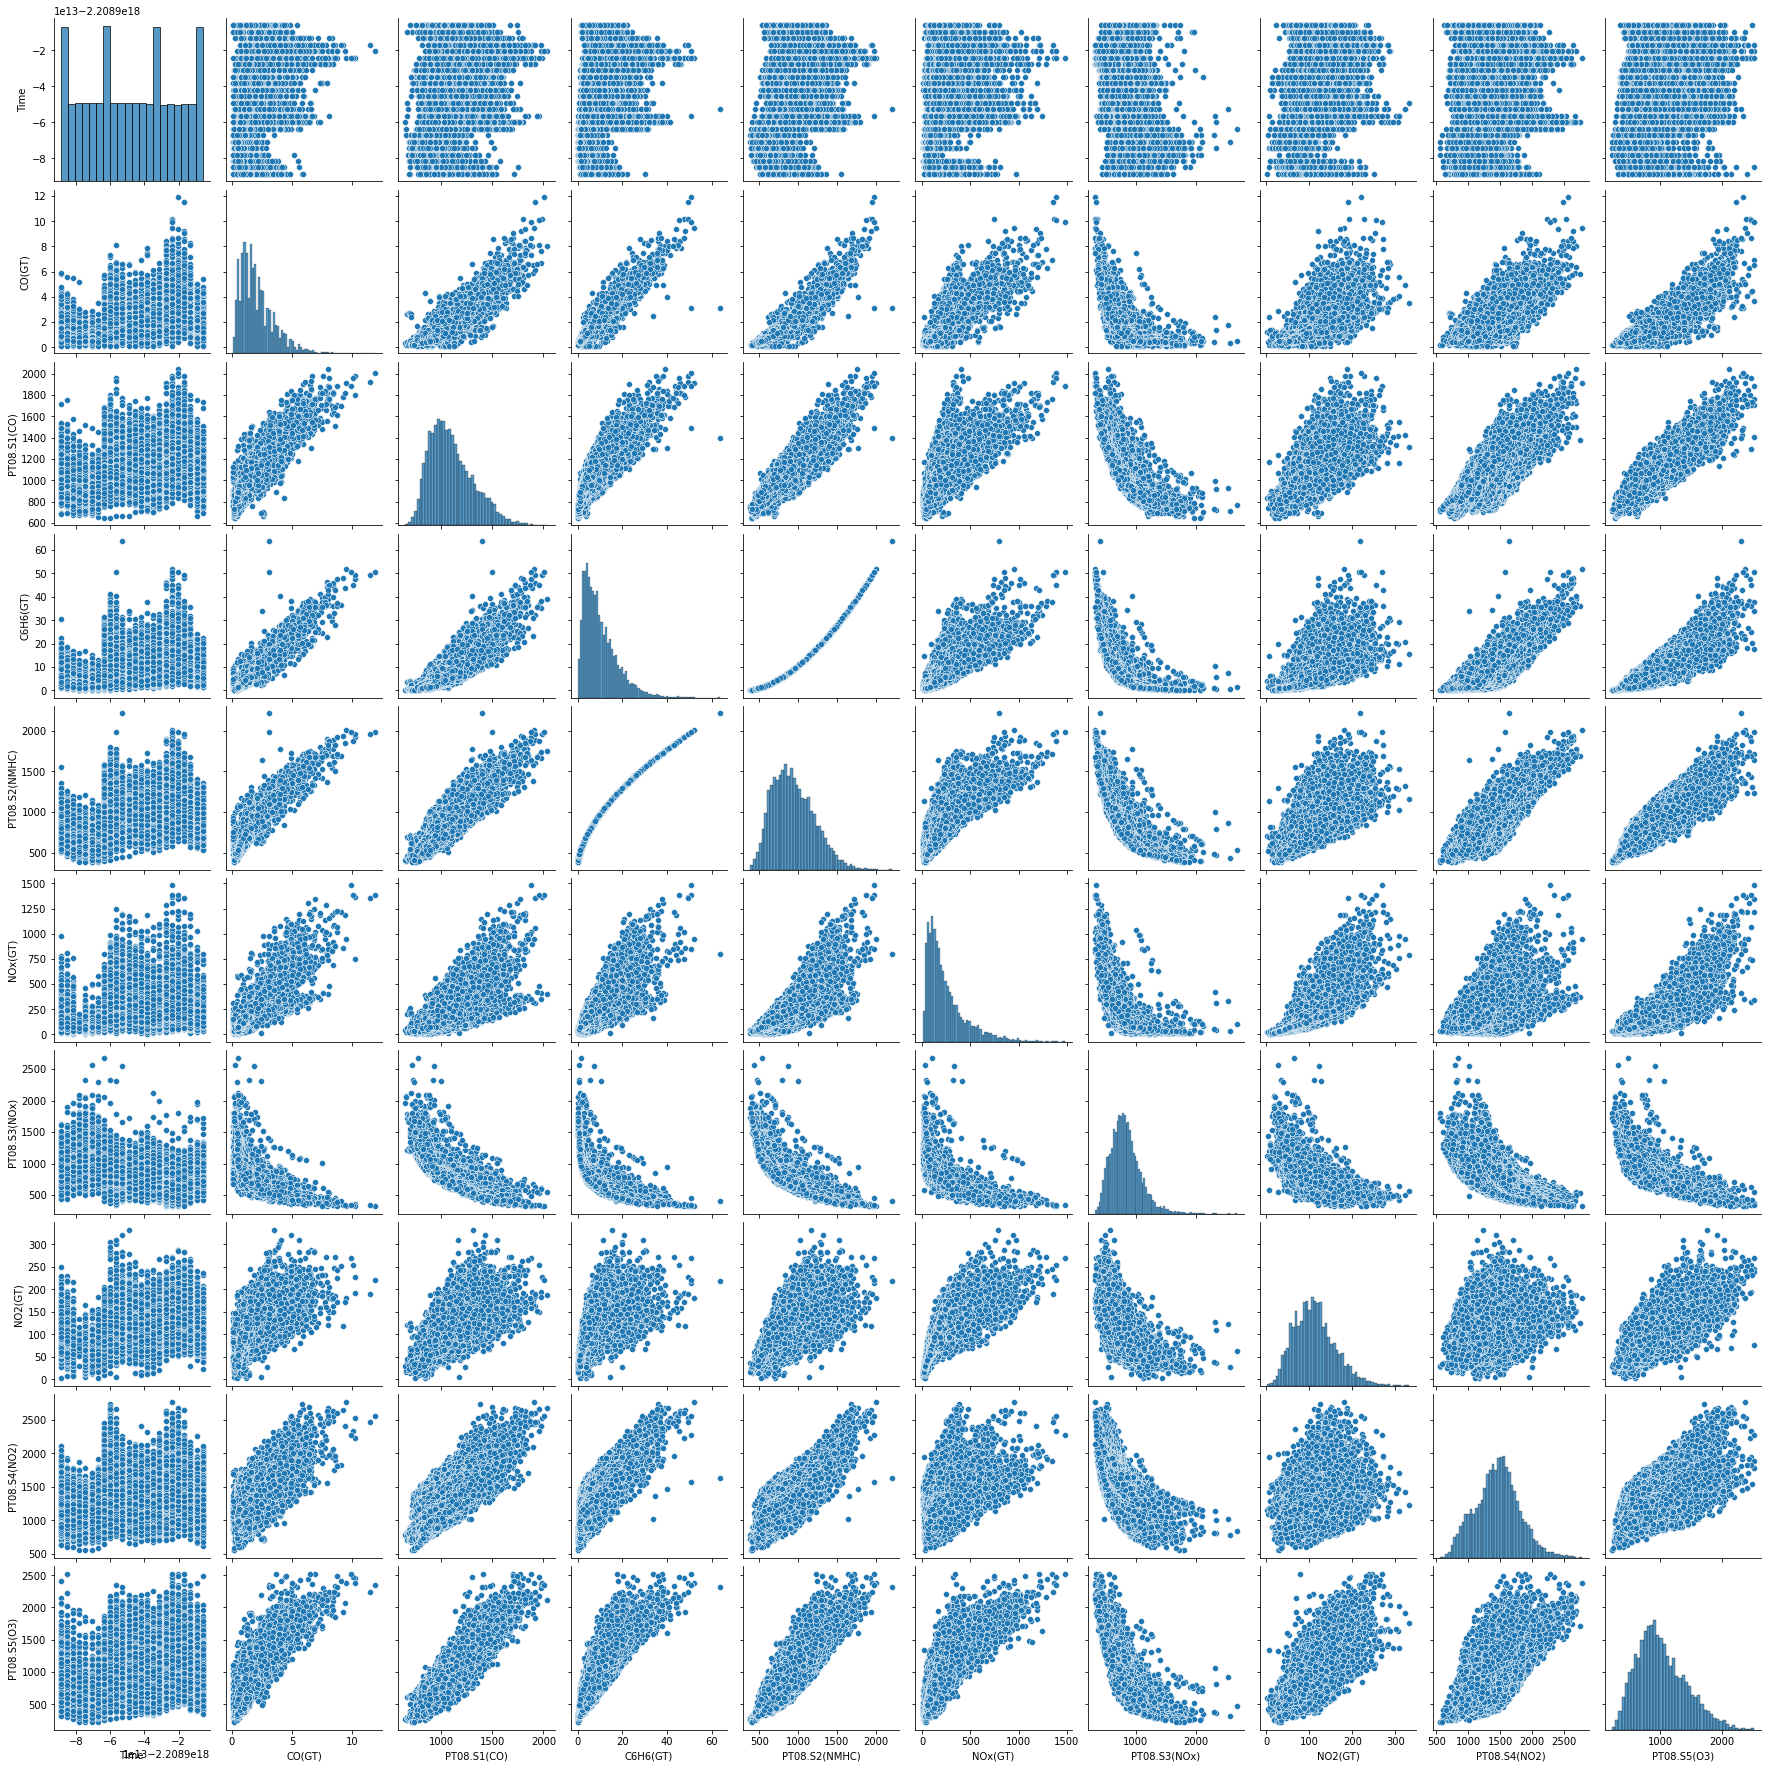

In [ ]:
sns.pairplot(df)

In this huge plot we can see tat there are some linearity.

In [ ]:
from scipy.stats import pearsonr
df_filled = df.fillna(df.median())

In [ ]:
for col in df_filled.columns:
  x = df_filled[col]
  corr, _ = pearsonr(df['C6H6(GT)'], x)
  print(col, ':', corr)

Time : 0.34416926133777814
CO(GT) : 0.8418018840475501
PT08.S1(CO) : 0.8837950766080699
C6H6(GT) : 1.0
PT08.S2(NMHC) : 0.9819503158012672
NOx(GT) : 0.6563253588618126
PT08.S3(NOx) : -0.7357441198223598
NO2(GT) : 0.5587103629692699
PT08.S4(NO2) : 0.7657313582719653
PT08.S5(O3) : 0.8656885045054727


These values we got earlier in the correlation matrix too, but this is with the filled median values. The degree of freedom is huge (+8000), so the critical value is very tiny, therefore we accept that these features are dependent with C6H6(GT), which is the target.

# Pipeline

## Preprocessing

In [ ]:
# I know I could set this at the beginning, but i used to write C6H6(GT), so sometimes I use TARGET, sometimes this. :)

TARGET = 'C6H6(GT)'
SEED = 42

In [ ]:
NUMERICAL = df.select_dtypes('float64').columns.tolist()
if TARGET in NUMERICAL:
  NUMERICAL.remove(TARGET)

## Split

In [ ]:
train, test = train_test_split(df, test_size = 0.2)
print(train.shape)
print(test.shape)

(7192, 10)
(1799, 10)


In [ ]:
target = train[TARGET].values
target

array([ 3.1, 10.3, 19.1, ..., 15.4, 16.4, 12.3])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train.drop(TARGET, axis = 1), target, random_state = SEED, shuffle = True, test_size = 0.2)

## Transformation

In [ ]:
# As we discussed above, I will choose median replace strategy.
# Try it with MinMaxScaler, and if the results are not quite good, we can change that later.

numerical_def = gen_features(
    columns = [[c] for c in NUMERICAL],
    classes = [
        {'class': SimpleImputer, 'strategy': 'median'},
        {'class': MinMaxScaler}
    ]
)

In [ ]:
features = numerical_def
mapper = DataFrameMapper(features)
len(features)

9

In [ ]:
train.shape, train_X.shape, test_X.shape

((7192, 10), (5753, 9), (1439, 9))

# Linear Regression

## LR Baseline

In [ ]:
train_X_tr = pd.DataFrame(mapper.fit_transform(train_X))
test_X_tr = pd.DataFrame(mapper.transform(test_X))

train_y_tr = pd.Series(np.sqrt(train_y))
test_y_tr = pd.Series(np.sqrt(test_y))

In [ ]:
train_X_tr.shape, train_y_tr.shape, test_X_tr.shape, test_y_tr.shape

((5753, 9), (5753,), (1439, 9), (1439,))

In [ ]:
linreg = LinearRegression()
linreg.fit(train_X_tr, train_y_tr)
print(f'\nR2 Test Score: {linreg.score(test_X_tr, test_y_tr)}')


R2 Test Score: 0.9991043149661787


In [ ]:
print(f'R2 Train Score: {linreg.score(train_X_tr, train_y_tr)}')

R2 Train Score: 0.9991744027580638


These scores are pretty good.

In [ ]:
#cross validation
def rmse(y_gt, Y_pr):
    return np.sqrt(mean_squared_error(y_gt, Y_pr))

print('RMSE Test: ')
print(rmse(test_y_tr, linreg.predict(test_X_tr)))
print('-'*30)

rmse_scorer = metrics.make_scorer(rmse)
print('RMSE cross-validation scores:')
CV_score = cross_val_score(linreg, train_X_tr, train_y_tr, cv=5, scoring=rmse_scorer, )
print(CV_score)
print('-'*30)

print('RMSE average cross-validation scores:')
print(np.sum(CV_score)/5)
print('-'*30)

RMSE Test: 
0.03413583195833691
------------------------------
RMSE cross-validation scores:
[0.03312559 0.03405412 0.03246884 0.0320337  0.03114855]
------------------------------
RMSE average cross-validation scores:
0.03256615808439013
------------------------------


Scores are nice.

In [ ]:
#metrics
predictions = linreg.predict(test_X_tr)

mae = metrics.mean_absolute_error(test_y_tr, predictions)
mse = metrics.mean_squared_error(test_y_tr, predictions)
r2 = metrics.r2_score(test_y_tr, predictions)
rmse = np.sqrt(metrics.mean_squared_error(test_y_tr, predictions))

pd.DataFrame.from_dict({'MAE':mae, 'MSE':mse, 'R2':r2, 'RMSE':rmse}, orient='index', columns=['Score'])

,Score
MAE,0.023928
MSE,0.001165
R2,0.999104
RMSE,0.034136


The RMSE tells how well a regression model can predict the value of a response variable in absolute terms. I will chose that.

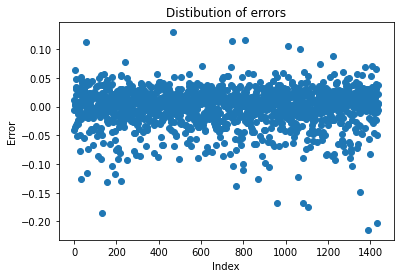

In [ ]:
#errors visualization
pred = linreg.predict(test_X_tr)
errors = test_y_tr - pred

plt.scatter(list(range(len(errors))),errors)
plt.title("Distibution of errors")
plt.ylabel('Error')
plt.xlabel('Index')
plt.show()

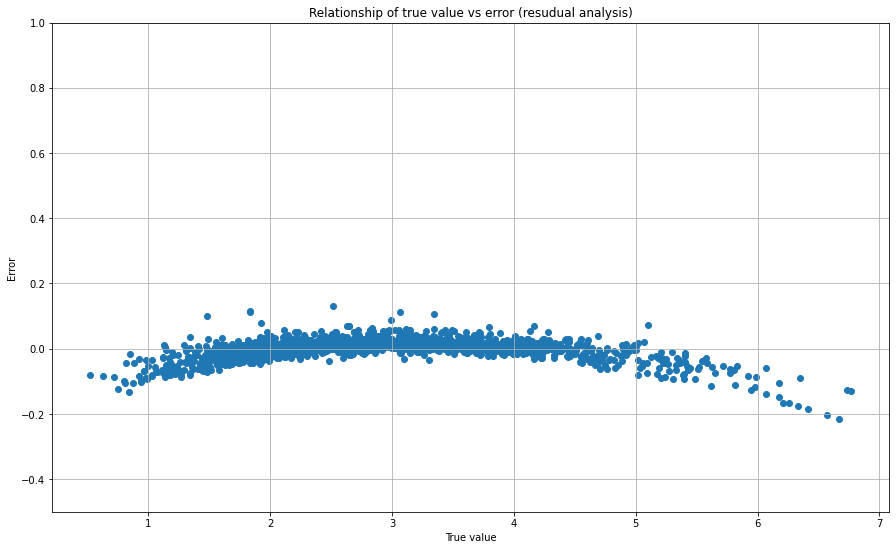

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(pred,errors)
plt.title('Relationship of true value vs error (resudual analysis)')
plt.ylabel('Error')
plt.xlabel('True value')
plt.ylim(-0.5, 1)
plt.grid()
plt.show()

Errors are not much, I think this model performs great.

### Pipeline

In [ ]:
def evaluate_model(train, test, tr_y, tst_y, pipeline):
    pipeline.fit(train, tr_y)
    pred_test = pipeline.predict(test)
    pred_train = pipeline.predict(train)
    mapper = pipeline.named_steps['mapper']

    return pd.DataFrame({
        'train_RMSE': [np.sqrt(mean_squared_error(tr_y, pred_train))], 
        'train_R2': [r2_score(tr_y, pred_train)],
        'test_RMSE': [np.sqrt(mean_squared_error(tst_y, pred_test))],
        'test_R2': [r2_score(tst_y, pred_test)]
    }), mapper.transformed_names_

In [ ]:
pipeline = Pipeline([
    ('mapper', mapper),
    ('estimator', LinearRegression())
])

In [ ]:
# Evaluate the same model using $\log(y)$ instead of $y$
scores, _ = evaluate_model(train_X, test_X, train_y_tr, test_y_tr, pipeline)
scores

,train_RMSE,train_R2,test_RMSE,test_R2
0,0.032411,0.999174,0.034136,0.999104


Again, I assume that these scores are great.

In [ ]:
y_pred = linreg.predict(test_X_tr)
preds = pd.DataFrame()

preds['y_test'] = test_y_tr
preds['y_pred'] = y_pred

Text(0, 0.5, 'predicted y')

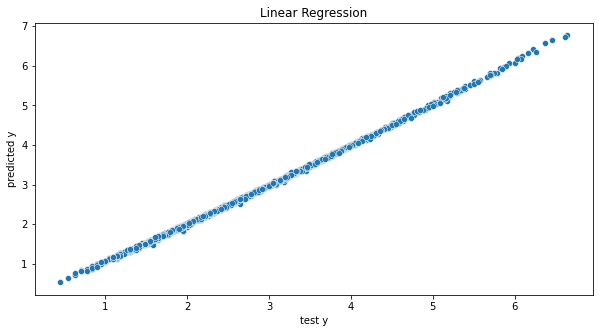

In [ ]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = test_y_tr, y = y_pred)
plt.title('Linear Regression')
plt.xlabel('test y')
plt.ylabel('predicted y')

In [ ]:
preds = pd.DataFrame(np.sort(preds.values, axis=0), index=preds.index, columns=preds.columns)

preds[preds['y_pred'] > preds['y_pred'].quantile(0.995)]

,y_test,y_pred
1431,6.090977,6.258226
1432,6.156298,6.330850
1433,6.228965,6.349831
1434,6.260990,6.414234
1435,6.363961,6.566877
1436,6.449806,6.664564
1437,6.610598,6.736553
1438,6.640783,6.769929


As we can see here, there is a little gap between 6.4 - 6.6.

Text(0.5, 1.0, 'Predicted y vs true y')

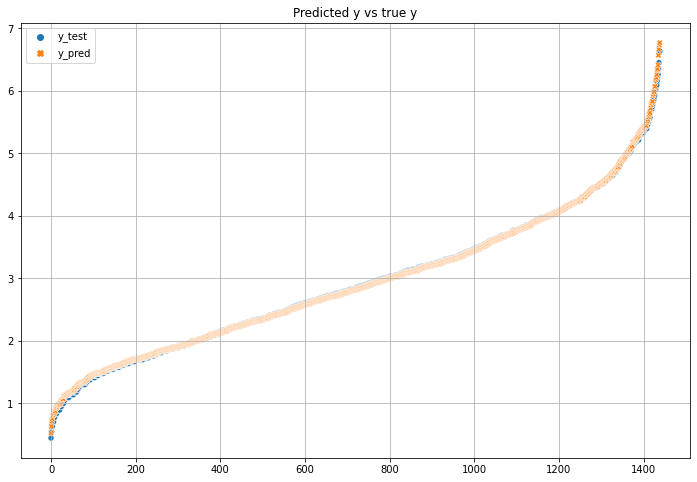

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = preds)
plt.grid()
plt.title('Predicted y vs true y')

The prediction is pretty good. On the top right, there is something to check.

What happen if the outliers above ~6.4 removed? Check it!

In [ ]:
test_X_tr_new = pd.DataFrame(test_X_tr)
test_X_tr_new['test_y_tr'] = test_y_tr
test_X_tr_new.head()

,0,1,2,3,4,5,6,7,8,test_y_tr
0,0.000000,0.110169,0.196468,0.173676,0.129667,0.267683,0.393939,0.153430,0.246301,1.949359
1,0.739130,0.449153,0.716703,0.622064,0.266124,0.052944,0.327273,0.699910,0.606179,5.366563
2,0.565217,0.144068,0.242090,0.249590,0.117447,0.224481,0.321212,0.389440,0.204091,2.569047
3,0.086957,0.050847,0.186166,0.101038,0.021724,0.477764,0.154545,0.313177,0.110531,1.341641
4,0.608696,0.144068,0.364974,0.264336,0.117447,0.176620,0.321212,0.424188,0.280679,2.683282


In [ ]:
test_X_tr_new = test_X_tr_new[test_X_tr_new['test_y_tr'] < 6.4]

In [ ]:
test_y_tr_new = test_X_tr_new['test_y_tr']
test_X_tr_new = test_X_tr_new.drop('test_y_tr', axis = 1)
test_X_tr_new.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.110169,0.196468,0.173676,0.129667,0.267683,0.393939,0.153430,0.246301
1,0.739130,0.449153,0.716703,0.622064,0.266124,0.052944,0.327273,0.699910,0.606179
2,0.565217,0.144068,0.242090,0.249590,0.117447,0.224481,0.321212,0.389440,0.204091
3,0.086957,0.050847,0.186166,0.101038,0.021724,0.477764,0.154545,0.313177,0.110531
4,0.608696,0.144068,0.364974,0.264336,0.117447,0.176620,0.321212,0.424188,0.280679


In [ ]:
y_pred_new = linreg.predict(test_X_tr_new)

preds_new = pd.DataFrame()

preds_new['y_test'] = test_y_tr_new
preds_new['y_pred'] = y_pred_new

preds_new = pd.DataFrame(np.sort(preds_new.values, axis=0), index=preds_new.index, columns=preds_new.columns)

Text(0.5, 1.0, 'Predicted y vs True y Without Outliners')

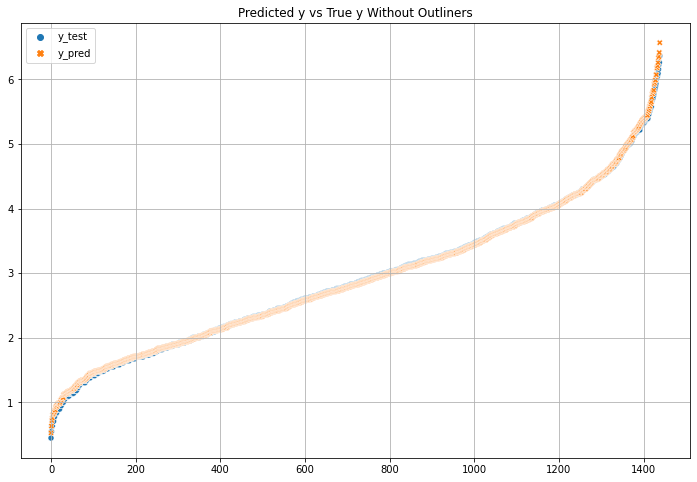

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = preds_new)
plt.grid()
plt.title('Predicted y vs True y Without Outliners')

Notice that the outliers at the top of the plot are disappeared.

In [ ]:
linreg = LinearRegression()
linreg.fit(train_X_tr, train_y_tr)
print(f'\nR2 Test Score: {linreg.score(test_X_tr_new, test_y_tr_new)}')


R2 Test Score: 0.999127876362656


The R2 Test Score is a bit better, but not significantly.

## Drop feature

In [ ]:
def feature_dropper(df, quantile, TARGET):
  # This function create a new Linear Regression where features are dropped based on the given quantile percentage

  # Calculate the correlations
  df_corr = df.corr()
  
  # Absolute correlations between the target - features
  target_corr = abs(df_corr[df_corr.columns == TARGET])
  target_corr = target_corr.T

  # Get the feature names, that has more correlation that the given quantile
  quantile /= 100
  top_corr = target_corr[target_corr[TARGET] > target_corr[TARGET].quantile(quantile)].index.tolist()
  top_corr.remove(TARGET)

  if quantile:
    print('Remaining features after drop:', top_corr, '\n')

  # Pipeline
  top_corr_features = [f for f in features if f[0][0] in top_corr]
  pipeline = Pipeline([
      ('mapper', DataFrameMapper(top_corr_features)),
      ('estimator', LinearRegression())
  ])

  # scores
  scores, colnames = evaluate_model(train_X, test_X, train_y_tr, test_y_tr, pipeline)

  print('RMSE cross-validation scores:')

  CV_score = cross_val_score(pipeline, train_X, train_y_tr, cv=5, scoring=rmse_scorer, )
  print(CV_score)
  print('-'*30)

  print('RMSE average cross-validation scores:')
  print(np.sum(CV_score)/5)
  print('-'*30)

  return scores

**Original with all the features used before**

In [ ]:
feature_dropper(df, 0, TARGET)

RMSE cross-validation scores:
[0.03388794 0.03472607 0.03311961 0.03240075 0.03186806]
------------------------------
RMSE average cross-validation scores:
0.03320048578282098
------------------------------


,train_RMSE,train_R2,test_RMSE,test_R2
0,0.033038,0.999142,0.035147,0.99905


Drop features that has lower correlation than 25%

In [ ]:
feature_dropper(df, 25, TARGET)

Remaining features after drop: ['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'] 

RMSE cross-validation scores:
[0.03496287 0.03593549 0.03480377 0.03336541 0.03256096]
------------------------------
RMSE average cross-validation scores:
0.034325699889248364
------------------------------


,train_RMSE,train_R2,test_RMSE,test_R2
0,0.034184,0.999082,0.036014,0.999003


Drop features that has lower correlation than 50%

In [ ]:
feature_dropper(df, 50, TARGET)

Remaining features after drop: ['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)'] 

RMSE cross-validation scores:
[0.03855563 0.04148644 0.03913701 0.03781696 0.03640191]
------------------------------
RMSE average cross-validation scores:
0.03867958959966357
------------------------------


,train_RMSE,train_R2,test_RMSE,test_R2
0,0.038587,0.99883,0.039997,0.99877


Drop features that has lower correlation than 75%

In [ ]:
feature_dropper(df, 75, TARGET)

Remaining features after drop: ['CO(GT)', 'PT08.S2(NMHC)'] 

RMSE cross-validation scores:
[0.03859191 0.04162577 0.03937241 0.03788538 0.03655124]
------------------------------
RMSE average cross-validation scores:
0.038805343504138924
------------------------------


,train_RMSE,train_R2,test_RMSE,test_R2
0,0.038722,0.998822,0.040144,0.998761


Thats interesting, only with two feature the model perform really good. This is because in the correlation is high between `PT08.S"(NMHC)`, `CO(GT)` and `C6H6(GT)`

Compare these results for the previous model, when I did not dropped the features, it's not perform better, but we dont need as many feature as the original.

# Regularization

In [ ]:
def plot_importance(est, colnames, top_n=20):
    importance = pd.DataFrame({
        'abs_weight': np.abs(est.coef_),
        'feature': colnames
    })
    imp20 = importance.sort_values(by='abs_weight', ascending=False)[:top_n]
    sns.barplot(y='feature', x='abs_weight', data=imp20, orient='h');

   train_RMSE  train_R2  test_RMSE   test_R2
0    6.878137  0.138357   6.935936  0.136985


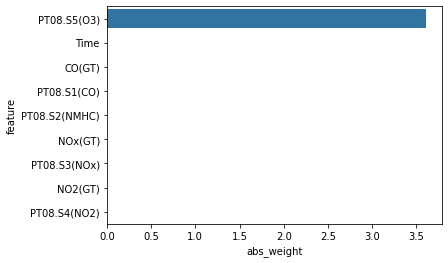

In [ ]:
lasso = Lasso() 
pipeline = Pipeline([('mapper', DataFrameMapper(features)), 
                     ('estimator', lasso)])

scores, colnames = evaluate_model(train_X, test_X, train_y, test_y, pipeline)
print(scores)

plot_importance(pipeline.named_steps['estimator'], colnames)

With Lasso, the model perform very low, R2 score is under 0.2 on test and train dataset too. This is because the Lasso thinks that the PT08.S5(03) is the most important feature, and only predict by that. (I'm not 100% sure about this.)

# Hyperparameters tuning

In this section I copied the code from the workshop colab due to lack of time. I tried to analyze what it does.

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
pipeline = Pipeline([
    ('mapper', DataFrameMapper(features)),
    ('estimator', ElasticNet(random_state=SEED))
])
grid = {
    'estimator__alpha': np.linspace(0, 300, 10),
    'estimator__l1_ratio': np.arange(0, 1.1, 0.1) 
}

gs = GridSearchCV(pipeline, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error', 
                  cv=cv)

In [ ]:
%%time
gs.fit(train_X, train_y);

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+03, tolerance: 3.324e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

CPU times: user 2.9 s, sys: 239 ms, total: 3.14 s
Wall time: 21.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('mapper',
                                        DataFrameMapper(features=[(['Time'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['CO(GT)'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['PT08.S1(CO)'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['PT08.S2(NMH

In [ ]:
gs.best_params_

{'estimator__alpha': 0.0, 'estimator__l1_ratio': 0.0}

Best parameters are 0.0; 0.0

In [ ]:
pipeline = clone(pipeline)
pipeline.set_params(**gs.best_params_);

scores, col = evaluate_model(train_X, test_X, train_y, test_y, pipeline)
scores

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+03, tolerance: 3.324e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

,train_RMSE,train_R2,test_RMSE,test_R2
0,1.173611,0.976162,1.196188,0.975113


R2 scores are good, but RMSE is a bit high.

In [ ]:
pipeline = clone(pipeline)
pipeline.set_params(**gs.best_params_);

scores, col = evaluate_model(train_X, test_X, train_y_tr, test_y_tr, pipeline)
scores

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+00, tolerance: 7.567e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

,train_RMSE,train_R2,test_RMSE,test_R2
0,0.033176,0.999163,0.034274,0.999109


With transformed target values, the model perfrom pretty good.

In [ ]:
%%time
pipeline = clone(pipeline)
grid = {
    'estimator__alpha': np.linspace(0, 0.5, 10),
    'estimator__l1_ratio': np.arange(0, 0.5, 0.1)
}
gs = GridSearchCV(pipeline, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error',
                  cv=cv, 
                  verbose=10)
gs.fit(train_X, np.log1p(train_y));

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.927e+01, tolerance: 2.801e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

CPU times: user 1.43 s, sys: 105 ms, total: 1.54 s
Wall time: 12.4 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('mapper',
                                        DataFrameMapper(features=[(['Time'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['CO(GT)'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['PT08.S1(CO)'],
                                                                   [SimpleImputer(strategy='median'),
                                                                    MinMaxScaler()]),
                                                                  (['PT08.S2(NMH

In [ ]:
pipeline = gs.best_estimator_
scores, col = evaluate_model(train_X, test_X, train_y_tr, test_y_tr, 
                             pipeline)
scores

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+00, tolerance: 7.567e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

,train_RMSE,train_R2,test_RMSE,test_R2
0,0.033176,0.999163,0.034274,0.999109


In [ ]:
gs.best_params_

{'estimator__alpha': 0.0, 'estimator__l1_ratio': 0.0}

In [ ]:
rmse_transformed_tst = np.sqrt(mean_squared_error(np.exp(pipeline.predict(X=test_X)), np.exp(test_y_tr)))
print(f'\nRMSE Test Score Transformed: {rmse_transformed_tst}')


RMSE Test Score Transformed: 9.68011176692844


In [ ]:
rmse_transformed_train = np.sqrt(mean_squared_error(np.exp(pipeline.predict(train_X)), np.exp(train_y_tr)))
print(f'\nRMSE Train Score Transformed: {rmse_transformed_train}')


RMSE Train Score Transformed: 19.246089402520628


With these tunings the RMSE are bigger then earlier.